# Importing Libraries

In [39]:
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Question 1
- ### Comparing histogram of two different images
In this part `Q1` and `Q1_1` are same images but with different contrast, the histogram shown bellow compares the  pixel intensity of these images. It can be said that increasing the contrast pushes pixel intensities toward the extremes. This results in a histogram with more pixels at the lower and higher ends of the intensity scale and fewer in the middle. 
- ### Pros and Cons of histograms
Changes in contrast are easily noticeable in histograms as they show how pixel intensities are spread.
While a histogram might indicate that contrast has changed, it won’t show if this change enhances or reduces image detail effectively. 


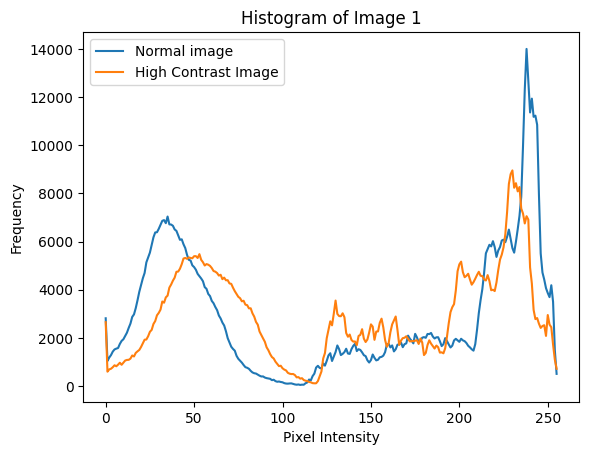

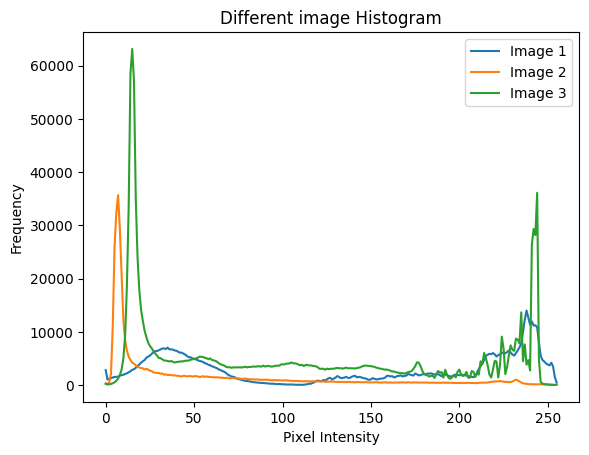

In [40]:
    img = cv2.imread("images/Q1.jpg", 1)
    img_con = cv2.imread("images/Q1_1.jpg", 1)

    img_q2 = cv2.imread("images/Q1_2.jpg", 1)
    img_q3 = cv2.imread("images/Q1_3.jpg", 1)

    histogram_q1 = cv2.calcHist([img], [0], None, [256], [0, 256])
    histogram_const = cv2.calcHist([img_con], [0], None, [256], [0, 256])

    plt.plot(histogram_q1, label='Normal image')
    plt.plot(histogram_const, label="High Contrast Image")
    plt.title("Histogram of Image 1")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    histogram_q2 = cv2.calcHist([img_q2], [0], None, [256], [0, 256])
    histogram_q3 = cv2.calcHist([img_q3], [0], None, [256], [0, 256])

    plt.plot(histogram_q1, label='Image 1')
    plt.plot(histogram_q2, label='Image 2')
    plt.plot(histogram_q3, label='Image 3')
    plt.title("Different image Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

- ### Comparative Histograms: 
By examining the histograms of `Q1`, `Q1_2`, and `Q1_3`, we can observe differences in brightness and contrast, revealing how pixel intensities vary across images.

# Question 2
- ### Compression
**Contrast stretching** is a straightforward method for enhancing an image’s dynamic range, **gamma correction** provides a more perceptually accurate approach for brightness adjustment

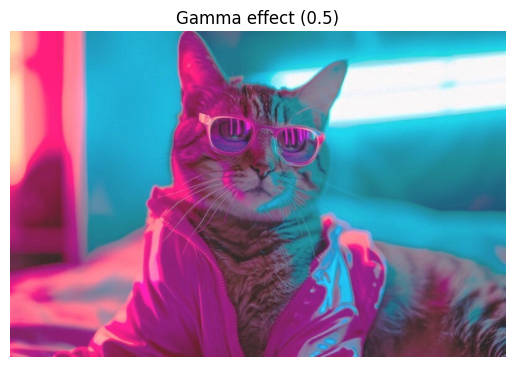

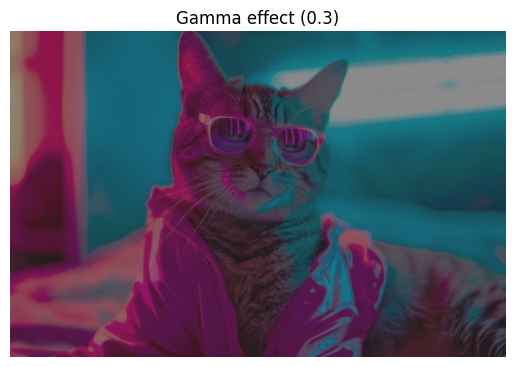

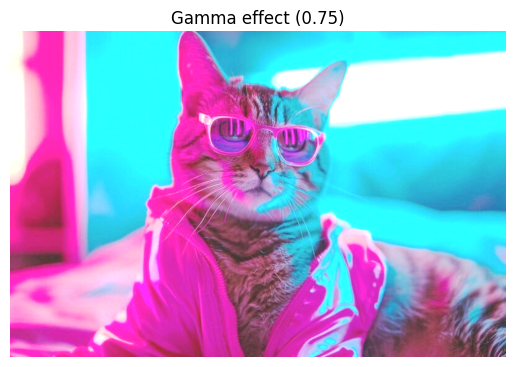

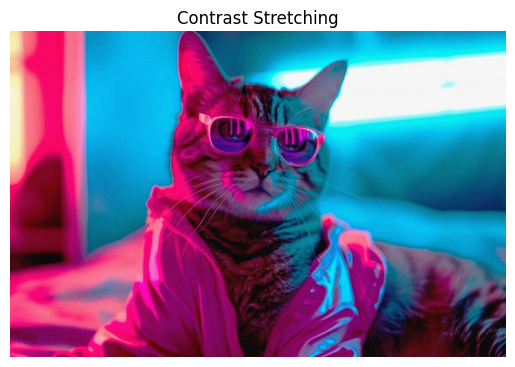

In [41]:
    img = cv2.imread("images/Q2.jpg", 1)
    mean = np.mean(img)

    gamma_1 = math.log(0.5 * 255) / math.log(mean)
    gamma_2 = math.log(0.3 * 255) / math.log(mean)
    gamma_3 = math.log(0.75 * 255) / math.log(mean)

    img_gamma1 = np.power(img, gamma_1).clip(0, 255).astype(np.uint8)
    img_gamma2 = np.power(img, gamma_2).clip(0, 255).astype(np.uint8)
    img_gamma3 = np.power(img, gamma_3).clip(0, 255).astype(np.uint8)
    
    xp = [0, 64, 128, 192, 255]
    fp = [0, 16, 128, 240, 255]
    x = np.arange(256)
    table = np.interp(x, xp, fp).astype('uint8')
    img_stretched = cv2.LUT(img, table)
    
    plt.axis('off')
    plt.title('Gamma effect (0.5)')
    plt.imshow(cv2.cvtColor(img_gamma1, cv2.COLOR_BGR2RGB))
    
    plt.show()  
    
    plt.axis('off')
    plt.title('Gamma effect (0.3)')
    plt.imshow(cv2.cvtColor(img_gamma2, cv2.COLOR_BGR2RGB))
    
    plt.show()
    
    plt.axis('off')
    plt.title('Gamma effect (0.75)')
    plt.imshow(cv2.cvtColor(img_gamma3, cv2.COLOR_BGR2RGB))
    
    plt.show()
    
    plt.axis('off')
    plt.title('Contrast Stretching')
    plt.imshow(cv2.cvtColor(img_stretched, cv2.COLOR_BGR2RGB))

# Question 3

 The **Median filter** is commonly used to reduce noise while preserving edges, specially for images with salt and pepper noise.

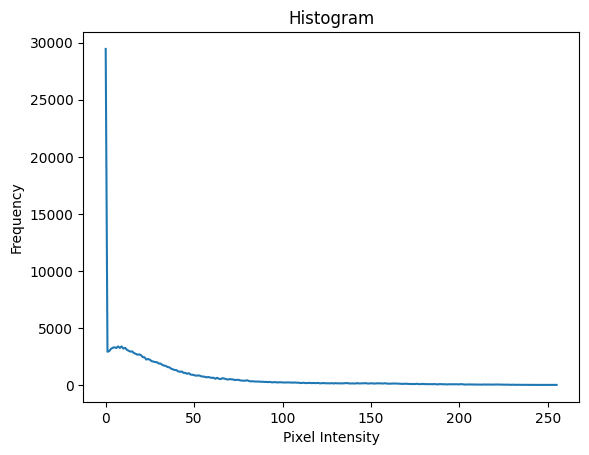

In [42]:
    img = cv2.imread("images/Q3.jpg", 1)  
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title("Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Question 4

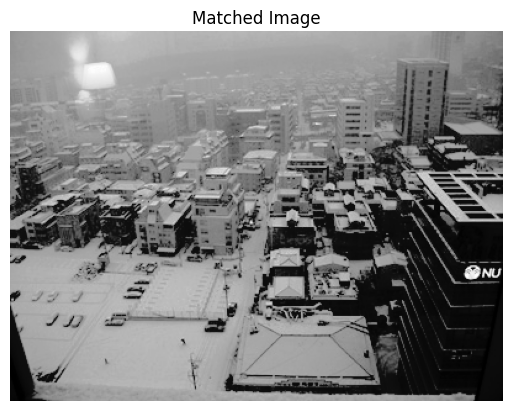

In [43]:
img_input = cv2.imread('images/Q4.jpg')
img_ref = cv2.imread('images/Q4_ref.jpg')


def calculate_cdf(hist):
    cdf = np.cumsum(hist)
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalize 
    return cdf_normalized



hist_input = cv2.calcHist([img_input], [0], None, [256], [0, 256])
cdf_input = calculate_cdf(hist_input)

hist_ref = cv2.calcHist([img_ref], [0], None, [256], [0, 256])
cdf_ref = calculate_cdf(hist_ref)

mapping = np.zeros(256)
for i in range(256):
    # Find the closest match in the reference CDF
    diff = np.abs(cdf_ref - cdf_input[i])
    mapping[i] = np.argmin(diff)

matched_image = np.zeros_like(img_input)
for i in range(img_input.shape[0]):
    for j in range(img_input.shape[1]):
        matched_image[i, j] = mapping[img_input[i, j]]

plt.figure()
plt.axis('off')
plt.title('Matched Image')
plt.imshow(matched_image)
plt.show()


# Question 5

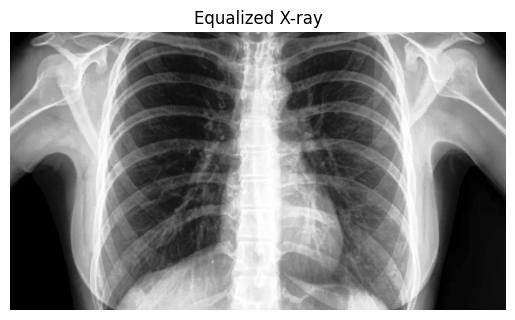

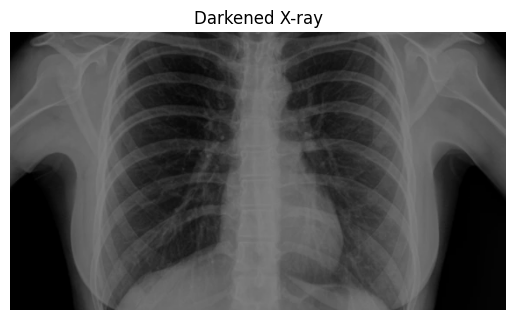

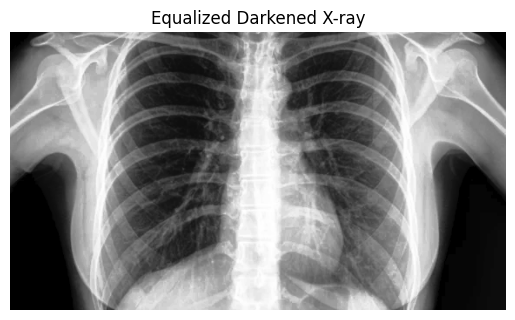

In [44]:
    xray_image = cv2.imread('images/Q5.jfif', 0)

    equalized_image = cv2.equalizeHist(xray_image)
    darkened_image = (xray_image * 0.5).astype('uint8')
    darkened_equalized_image = cv2.equalizeHist(darkened_image)
    
    plt.axis('off')
    plt.title('Equalized X-ray')
    plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
    
    plt.show()
    plt.axis('off')
    plt.title('Darkened X-ray')
    plt.imshow(cv2.cvtColor(darkened_image, cv2.COLOR_BGR2RGB))
    
    plt.show()
    plt.axis('off')
    plt.title('Equalized Darkened X-ray')
    plt.imshow(cv2.cvtColor(darkened_equalized_image, cv2.COLOR_BGR2RGB))

# Question 6

### Low-pass filter
Low-pass filters are used to smooth or blur images by removing high-frequency components. The result in this case is a softened image. like Gaussian filter
### High-pass filter
High-pass filters are used to enhance the high-frequency components of an image. Like edges details and textures.They remove the low-frequency components which makes the sharper details to stand out more in the image.


# Question 9

- #### What Problem Does Histogram Clipping Solve?

Histogram clipping helps control the amount of contrast added during histogram stretching. in stretching our image looks too bright in some areas, clipping limits this kind of effects and make the image to look more natural.

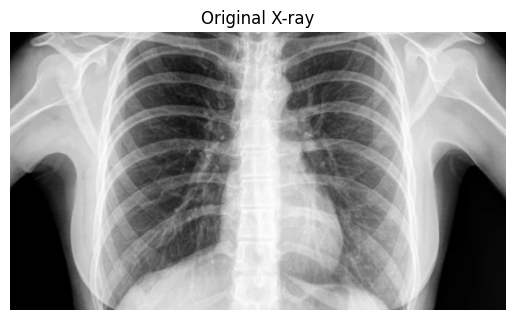

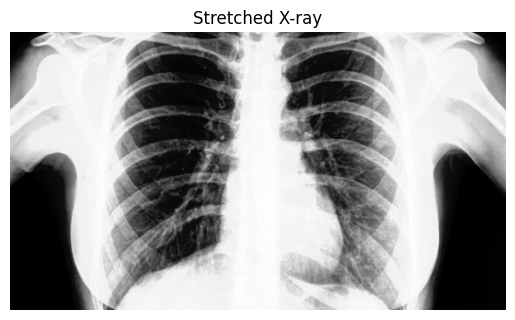

In [45]:
    xray_image = cv2.imread('images/Q5.jfif', 1)
    xp = [0, 64, 128, 192, 255]
    fp = [0, 16, 128, 240, 255]
    x = np.arange(256)
    table = np.interp(x, xp, fp).astype('uint8')
    xray_stretched = cv2.LUT(xray_image, table)

    plt.axis('off')
    plt.title('Original X-ray')
    plt.imshow(cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB))
    
    plt.show()
    
    plt.axis('off')
    plt.title('Stretched X-ray')
    plt.imshow(cv2.cvtColor(xray_stretched, cv2.COLOR_BGR2RGB))

# Question 10

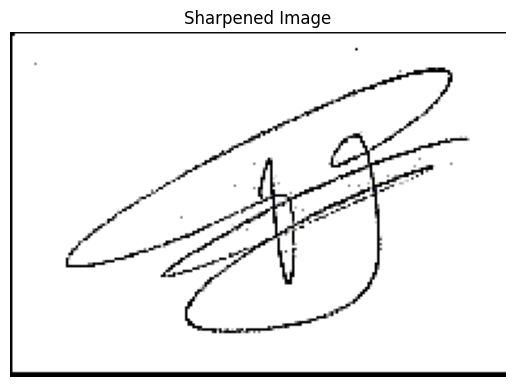

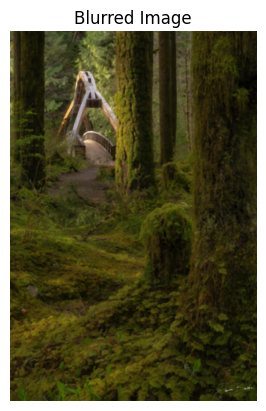

In [46]:
    img = cv2.imread('images/Q10_1.jpg', 1)
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharp_image = cv2.filter2D(img, -1, kernel)
    
    img_2 = cv2.imread('images/Q10_2.jpg', 1)
    blur_image = cv2.medianBlur(img_2, 5)

    plt.axis('off')
    plt.title('Sharpened Image')
    plt.imshow(cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB))
    
    plt.show()
    
    plt.axis('off')
    plt.title('Blurred Image')
    plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))